In [21]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  #will need to install
%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 7]
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns
import time
import datetime
import os
import statsmodels.api as sm
from pylab import rcParams

#package imports for development of machine learning model
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error

In [2]:
#Find your current worrking directory
os.getcwd()

'C:\\Users\\darsh\\OneDrive - Elastacloud Limited\\Community\\Conferences\\Workshops\\Digital Camp UK workshop'

In [3]:
#set current working directory to read data
os.chdir("C:\\Users\\darsh\\OneDrive - Elastacloud Limited\\Community\\Conferences\\Digital Camp\\Data\\climate-change-earth-surface-temperature-data")

In [4]:
# Read in Data
temperature = pd.read_csv("GlobalLandTemperaturesByCity.csv")

## Data Understanding
-What does each row represent?

-How many columns do I have? What are the columns measuring?

-How many rows are present in the data? How much history do I have?

-How much data is missing?

-Are there any outliers present?

In [5]:
# Find how many rows and columns the dataframe has
temperature.shape

(8599212, 7)

In [7]:
#explore the first 5 rows of data
temperature.head(5)

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [8]:
#Explore if there are any missing values
temperature.isnull().sum()

dt                                    0
AverageTemperature               364130
AverageTemperatureUncertainty    364130
City                                  0
Country                               0
Latitude                              0
Longitude                             0
dtype: int64

In [10]:
#Explore what types of data is there are (categorical, numerical, datetimes, etc)
temperature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8599212 entries, 0 to 8599211
Data columns (total 7 columns):
dt                               object
AverageTemperature               float64
AverageTemperatureUncertainty    float64
City                             object
Country                          object
Latitude                         object
Longitude                        object
dtypes: float64(2), object(5)
memory usage: 459.2+ MB


## Data Cleaning
- Dealing with missing values
- Dealing with outliers
- Correcting data types
- Create Features

In [6]:
# change the 'dt' column from object to datetime
temperature['dt'] = pd.to_datetime(temperature['dt'],format = "%Y-%m-%d")

In [7]:
#create an year column from 'dt'
temperature['Year'] = temperature['dt'].dt.year
#show the first row of the dataframe
temperature.iloc[0]

dt                               1743-11-01 00:00:00
AverageTemperature                             6.068
AverageTemperatureUncertainty                  1.737
City                                           Århus
Country                                      Denmark
Latitude                                      57.05N
Longitude                                     10.33E
Year                                            1743
Name: 0, dtype: object

In [8]:
#create a month columns from 'dt'
temperature['Month'] = temperature['dt'].dt.month
temperature.iloc[0]

dt                               1743-11-01 00:00:00
AverageTemperature                             6.068
AverageTemperatureUncertainty                  1.737
City                                           Århus
Country                                      Denmark
Latitude                                      57.05N
Longitude                                     10.33E
Year                                            1743
Month                                             11
Name: 0, dtype: object

In [9]:
#drop any rows missing values
temperature = temperature.dropna()
#check how the dataframe shape has changed
temperature.shape

(8235082, 9)

In [50]:
#establish how many unique countries are represented in the data
temperature['Country'].value_counts()

India                       960548
China                       819132
United States               661524
Brazil                      451645
Russia                      448663
Japan                       356467
Indonesia                   273295
Germany                     256446
United Kingdom              215288
Mexico                      208020
Nigeria                     157012
Spain                       156528
Turkey                      147086
Iran                        146168
Italy                       132972
Philippines                 124865
Pakistan                    123265
Poland                      120308
France                      113976
South Africa                 93653
Venezuela                    83378
Colombia                     79246
Romania                      79150
Netherlands                  75984
Ukraine                      75981
Canada                       71444
Malaysia                     64723
Vietnam                      62221
Taiwan              

In [51]:
len(temperature['Country'].value_counts())

159

## Data Exploration
-What pattern can we see in the data?

-Are some relationships more intersting than others?

-What correlations are present in the data?

In [10]:
def centuryFromYear(year):
    return (year - 1) // 100 + 1 

In [11]:
datagrouped = temperature.groupby(["Year"])['AverageTemperature'].mean()
df = datagrouped.reset_index()
df['century'] = df['Year'].apply(centuryFromYear)

In [12]:
# style
plt.style.use('seaborn-darkgrid')
 
# create a color palette
palette = plt.get_cmap('Set1')

#plt.figure(figsize=(22,6))

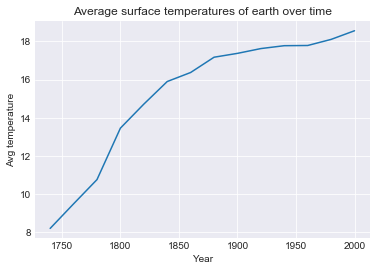

In [13]:
plt.title('Average surface temperatures of earth over time')
plt.xlabel('Year')
plt.ylabel('Avg temperature')

df.groupby((df.Year//20)*20)['AverageTemperature'].mean().plot(kind='line')

In [14]:
citiesEurope = temperature[(temperature['City'].isin(['London','Paris','Rome','Dublin','Madrid'])) & (temperature['Year'] >=1950)]

In [15]:
dfCountryGrouped = citiesEurope.groupby(['Year','City'])['AverageTemperature','AverageTemperatureUncertainty'].mean()
dfCountryGrouped
df = dfCountryGrouped.reset_index()
plotdf = df.pivot(index='Year', columns='City', values='AverageTemperature').reset_index()
plotdf.index.name = plotdf.columns.name = None
plotdf.head()

,Year,Dublin,London,Madrid,Paris,Rome
0,1950,8.701417,8.711833,12.174083,10.768333,13.089333
1,1951,8.482667,8.839333,11.146250,10.590750,12.663000
2,1952,8.559583,9.145958,11.501083,10.531167,12.606583
3,1953,9.388000,9.666667,11.755500,10.837333,12.156000
4,1954,8.667750,8.949250,11.288917,10.254333,11.648917


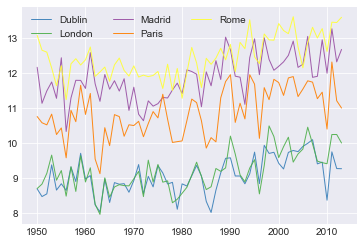

In [16]:
num=0
for column in plotdf.drop('Year', axis=1):
    num+=1
    plt.plot(plotdf['Year'], plotdf[column], marker='', color=palette(num), linewidth=1, alpha=0.9, label=column)
plt.legend(loc=2, ncol=3)

## What do we observe?
In the last 30 years, the cities have started warming up significantly

They all follow a similiar trend
Try it yourself

Try adding Title and Axis Labels to the above plot

Can you try plotting the above graph for only the last 30 years to look at it more closely?

In [ ]:
#### try your code here ####

### Time series analysis

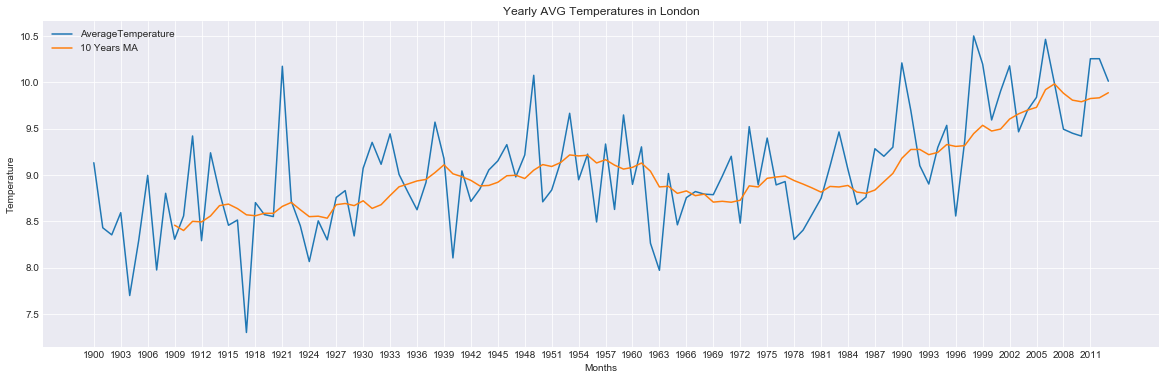

In [17]:
temperature['Month'] = temperature['dt'].dt.month
londonTemperature = temperature[(temperature['City'] == 'London') & (temperature['Year'] >= 1900)]
year_avg = pd.pivot_table(londonTemperature, values='AverageTemperature', index='Year', aggfunc='mean')
year_avg['10 Years MA'] = year_avg['AverageTemperature'].rolling(10).mean()
year_avg[['AverageTemperature','10 Years MA']].plot(figsize=(20,6))
plt.title('Yearly AVG Temperatures in London')
plt.xlabel('Months')
plt.ylabel('Temperature')
plt.xticks([x for x in range(1900,2012,3)])
plt.show()

In [18]:
londonTemperature.head()
london = londonTemperature[['dt','AverageTemperature','Year','Month']].copy()

### What do we observe?¶
-The 10 year moving average (Amber line) re-iterates the increase in average temperature over years

-London has become hotter in the last 20 years

### Try it yourself
-Try plotting the same time series for Paris or Berlin

-What does your time series graph indicate?

In [ ]:
##Try your code here####

In [19]:
train = londonTemperature[:-60].copy()
val = londonTemperature[-60:-12].copy()
test = londonTemperature[-12:].copy()

In [20]:
temp = temperature.groupby(['dt','Country'])['AverageTemperature'].mean().reset_index()
tempUK = temp[temp['Country']=='United Kingdom'].drop(['Country'], axis=1)
UkData= tempUK.set_index('dt')

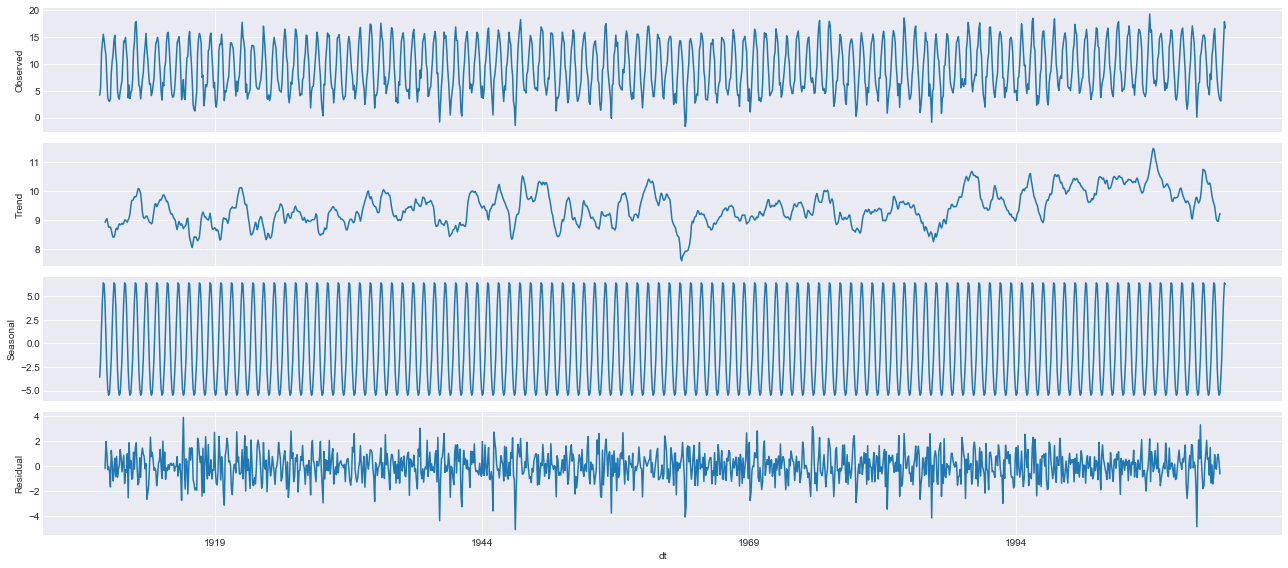

In [22]:
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(UkData[1900:], model='additive',freq = 12)
fig = decomposition.plot()

### Time series Reading
Try reading up on time series analysis which is one of the interesting techniques statisticians use for forecasting

https://towardsdatascience.com/an-end-to-end-project-on-time-series-analysis-and-forecasting-with-python-4835e6bf050b

https://www.machinelearningplus.com/time-series/time-series-analysis-python/

## Data Modelling
- Select features relevant for modelling
- Create a temporal train-test split
- Apply algorithms
- Evaluate Performance

In [52]:
#Filter the data to just look at the UK
UK = temperature[temperature['Country'] == "United Kingdom"]
UK.head(5)

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,Year,Month
38481,1743-11-01,8.758,1.886,Aberdeen,United Kingdom,57.05N,1.48W,1743,11
38486,1744-04-01,6.070,2.934,Aberdeen,United Kingdom,57.05N,1.48W,1744,4
38487,1744-05-01,7.751,1.494,Aberdeen,United Kingdom,57.05N,1.48W,1744,5
38488,1744-06-01,10.620,1.574,Aberdeen,United Kingdom,57.05N,1.48W,1744,6
38489,1744-07-01,12.350,1.591,Aberdeen,United Kingdom,57.05N,1.48W,1744,7


In [53]:
UK.shape

(215288, 9)

In [54]:
# what are the min and max dates of UK temperature data
min = UK.dt.min()
max = UK.dt.max()
print(min)
print(max)
print(max-min)

1743-11-01 00:00:00
2013-08-01 00:00:00
98524 days 00:00:00


In [56]:
UK.isnull().sum()

dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
City                             0
Country                          0
Latitude                         0
Longitude                        0
Year                             0
Month                            0
dtype: int64

In [83]:
# group by year and calculate the country's average temperature and uncertainty
UK_avg = temperature.groupby(['Year'], as_index = False)['AverageTemperature', "AverageTemperatureUncertainty"].agg(['mean'])
UK_avg = UK_avg.reset_index()
UK_avg.head()

,Year,AverageTemperature,AverageTemperatureUncertainty
,,mean,mean
0,1743,4.882424,1.953902
1,1744,10.734047,1.844291
2,1745,1.497593,1.844013
3,1750,9.872808,1.792405
4,1751,10.046739,1.733012


In [84]:
#order the dataframe by year
UK_sorted = UK_avg.sort_values(['Year'], ascending = True)
UK_sorted.head(10)

,Year,AverageTemperature,AverageTemperatureUncertainty
,,mean,mean
0,1743,4.882424,1.953902
1,1744,10.734047,1.844291
2,1745,1.497593,1.844013
3,1750,9.872808,1.792405
4,1751,10.046739,1.733012
5,1752,4.253064,1.977075
6,1753,9.452666,3.557897
7,1754,9.364700,3.197000
8,1755,8.825222,4.203707


In [92]:
#how many years data do we have (270)
print(UK_sorted.Year.min())
print(UK_sorted.Year.max())

1743
2013


In [85]:
UK_sorted.columns

MultiIndex(levels=[['AverageTemperature', 'AverageTemperatureUncertainty', 'Year'], ['mean', '']],
           labels=[[2, 0, 1], [1, 0, 0]])

In [87]:
UK_sorted.columns = ['Year', 'avgTemperature', 'avgTemperatureUncertainty']
print(UK_sorted.columns)

Index(['Year', 'avgTemperature', 'avgTemperatureUncertainty'], dtype='object')


In [90]:
# create lag features to use in modelling 
UK_sorted['avgTempLag'] = UK_sorted['avgTemperature'].shift(1)
UK_sorted['avgTempUncertaintyLag'] = UK_sorted['avgTemperatureUncertainty'].shift(1)
UK_sorted = UK_sorted.fillna(0)
UK_sorted.head(20)

,Year,avgTemperature,avgTemperatureUncertainty,avgTempLag,avgTempUncertaintyLag
0,1743,4.882424,1.953902,0.000000,0.000000
1,1744,10.734047,1.844291,4.882424,1.953902
2,1745,1.497593,1.844013,10.734047,1.844291
3,1750,9.872808,1.792405,1.497593,1.844013
4,1751,10.046739,1.733012,9.872808,1.792405
5,1752,4.253064,1.977075,10.046739,1.733012
6,1753,9.452666,3.557897,4.253064,1.977075
7,1754,9.364700,3.197000,9.452666,3.557897
8,1755,8.825222,4.203707,9.364700,3.197000
9,1756,9.732708,4.075448,8.825222,4.203707


In [95]:
#check data types are suitable for alogorithm application
UK_sorted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 267 entries, 0 to 266
Data columns (total 5 columns):
Year                         267 non-null int64
avgTemperature               267 non-null float64
avgTemperatureUncertainty    267 non-null float64
avgTempLag                   267 non-null float64
avgTempUncertaintyLag        267 non-null float64
dtypes: float64(4), int64(1)
memory usage: 12.5 KB


In [114]:
#check there are no missing values
UK_sorted.isnull().sum()

Year                         0
avgTemperature               0
avgTemperatureUncertainty    0
avgTempLag                   0
avgTempUncertaintyLag        0
dtype: int64

In [91]:
X = UK_sorted.drop(['avgTemperature', 'avgTemperatureUncertainty'], axis =1)
Y = UK_sorted[['avgTemperature']]
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.3, shuffle = False, stratify = None)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(186, 3)
(81, 3)
(186, 1)
(81, 1)


In [94]:
#check the temporal split has been applied properly
print(X_train.Year.min())
print(X_train.Year.max())
print(X_test.Year.min())
print(X_test.Year.max())

1743
1932
1933
2013


In [98]:
regressor = LinearRegression()  
regressor.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [119]:
y_pred = pd.DataFrame(regressor.predict(X_test))
y_pred.head()

,0
0,18.408640
1,18.270488
2,18.439439
3,18.434870
4,18.456755


In [139]:
actual_vs_predicted = pd.concat([X_test['Year'].reset_index(drop=True),Y_test.reset_index(drop=True), y_pred], axis=1)
actual_vs_predicted.columns = ['Year','Actual_avgTemperature', 'Predicted_avgTemperature']
actual_vs_predicted.head()

,Year,Actual_avgTemperature,Predicted_avgTemperature
0,1933,17.428404,18.408640
1,1934,17.695059,18.270488
2,1935,17.647516,18.439439
3,1936,17.647437,18.434870
4,1937,17.764567,18.456755


In [128]:
print('Mean Absolute Error:', mean_absolute_error(Y_test, y_pred)) 

Mean Absolute Error: 1.41425600217782


In [138]:
#evaluate model
print("R2:", r2_score(Y_test, y_pred))

R2: -16.888146656536232


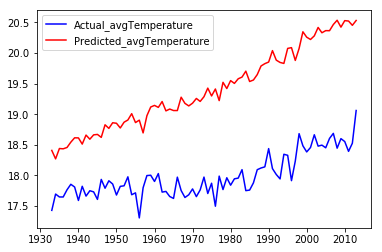

In [141]:
plt.plot(actual_vs_predicted.Year, actual_vs_predicted.Actual_avgTemperature, color='blue')
plt.plot(actual_vs_predicted.Year, actual_vs_predicted.Predicted_avgTemperature, color='red')
plt.legend()
# Display the plot
plt.show()

## Task: Have a go at improving the model performance by applying the 'Gradient Boosted Regressor'

## Task: Think about what other features might be useful to include into the model (e.g. global pollution levels, global meat consumption, etc)

## Task: Have a go at building a machine learning model to predict average global temperature (we have previously just looked at the UK)